In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PanelInputDataGenerator import PanelInputDataGenerator
import numpy as np
import random
from tqdm import tqdm
from typing import Dict, List
from matplotlib import colors

products_and_features_table = pd.read_pickle('raw_data_1728678rows_x_77columns.pkl')

In [2]:
# define function to rename features for better understanding in tables
def map_feature_name(name):
    mapping_more_meaningful_feature_names = {'customer_gpkenn':"customer_gpkenn",'dateYYYYMM':"dateYYYYMM",'Asset Management':"Asset Management",'Aval':"Aval",'Betriebliche Altersvorsorge':"Betriebliche Altersvorsorge",'Bond-Emissionen':"Bond-Emissionen",'Bürgschaften und Garantien':"Bürgschaften und Garantien",'Cash Pooling':"Cash Pooling",'Commerz Real - Immobilienleasing':"Immobilienleasing",'Commerz Real - Mobilienleasing':"Mobilienleasing",'Export Dokumentengeschäft':"Export Dokumentengeschäft",'Export- und Handelsfinanzierung':"Exportfinanzierung",'Forderungsmanagement':"Forderungsmanagement",'Geldmarktkredit':"Geldmarktkredit",'Global Payment Plus':"Global Payment Plus",'Import Dokumentengeschäft':"Import Dokumentengeschäft",'KK-Kredit':"KK-Kredit",'Kapitalanlagen':"Kapitalanlagen",'Rohstoffmanagement':"Rohstoffmanagement",'Sichteinlagen':"Sichteinlagen",'Termin-Einlage':"Termin-Einlage",'Unternehmensfinanzierung':"Unternehmensfinanzierung",'Währungsmanagement':"Währungsmanagement",'Zinsmanagement':"Zinsmanagement",'gp_bonirati':"Boni Rating",'gp_wzbran2_':"Industry",'gp_rckdgrp_':"Kundengruppe",'DAX':"DAX Index",'EUR_USD':"EUR USD Exchange Rate",'EURIBOR_ON':"EURIBOR ON",'EURIBOR_3M':"EURIBOR 3M",'EURIBOR_12M':"EURIBOR 12M",'LIBOR_USD_ON':"LIBOR USD ON",'LIBOR_USD_3M':"LIBOR USD 3M",'LIBOR_USD_12M':"LIBOR USD 12M",'Oil':"Oil Price",'EUR':"Transaction EUR",'USD':"Transaction USD",'GBP':"Transaction GBP",'Other_Currencies':"Transaction other currencies",'Abfallentsorgung und Rueckgewinnung':"Transaction Abfallentsorgung",'Bauindustrie und Handwerk':"Transaction Bauindustrie",'Beherbergung und Gastronomie':"Transaction Gastronomie",'Beratungsunternehmen':"Transaction Beratungsunternehmen",'Bergbau':"Transaction Bergbau",'Chemische Erzeugnisse':"Transaction Chemische Erzeugnisse",'Energieversorgung':"Transaction Energieversorgung",'Erziehung und Unterricht':"Transaction Erziehung und Unterricht",'Forstwirtschaft':"Transaction Forstwirtschaft",'Gebaeudebetreuung':"Transaction Gebaeudebetreuung",'Gesundheitswesen':"Transaction Gesundheitswesen",'Glas und Glaswaren':"Transaction Glas und Glaswaren",'Grundstuecks- und Wohnungswesen':"Transaction Grundstueckswesen",'Handel mit Kraftfahrzeugen':"Transaction Handel mit Kraftfahrzeugen",'Herst. von Kraftwagen':"Transaction Herst. von Kraftwagen",'Herst. von Papier':"Transaction Herst. von Papier",'Herst. von elektrischen Ausruestungen':"Transaction Herst. von elektr. Ausruestungen",'Landwirtschaft':"Transaction Landwirtschaft",'Maschinenbau':"Transaction Maschinenbau",'Metallerzeugung und -bearbeitung':"Transaction Metallerzeugung",'Mit Finanz- und VersicherungsDienstl. verbundene Taetigkeiten':"Transaction VersicherungsDienstleistungen",'Moebel':"Transaction Moebel",'Oeffentliche Verwaltung':"Transaction Oeffentliche Verwaltung",'Personen- und Gueterbefoerderung / Lagerei':"Transaction Personen- und Gueterbefoerderung",'Pharmazeutische Erzeugnisse':"Transaction Pharmazeutische Erzeugnisse",'Reisebueros und Reiseveranstalter':"Transaction Reiseveranstalter",'Sozialwesen':"Transaction Sozialwesen",'Textilien und Bekleidung':"Transaction Textilien und Bekleidung",'Untagged':"Transaction Branche unbekannt",'Unterhaltungsmedien wie Film':"Transaction Unterhaltungsmedien",'Verlagswesen':"Transaction Verlagswesen",'Vermittlung und Ueberlassung von Arbeitskraeften':"Transaction Vermittlung von Arbeitskraeften",'Versicherungen':"Transaction Versicherungen",'Wasserversorgung und Abwasserentsorgung':"Transaction Wasserversorgung",'Werbung und Marktforschung':"Transaction Werbung und Marktforschung",'Valutasaldo_avg':"Liquidity",'targets_delta_sum':'targets_delta_sum'}
    return mapping_more_meaningful_feature_names[name]

def rename_features(table:pd.DataFrame) ->pd.DataFrame:
    table.index = [map_feature_name(feature) for feature in table.index]
    return table

# overwrite scaled market features with un-scaled market features in raw data
gpkenn_date_columns = products_and_features_table[['customer_gpkenn','dateYYYYMM']]
market_features = pd.read_csv('all_market_features.csv',index_col=0)
market_features = market_features.reset_index(drop=False).rename(columns={"index":"dateYYYYMM"})
market_features_formatted = gpkenn_date_columns.merge(market_features, how='left', on="dateYYYYMM")
products_and_features_table[market_features_formatted.columns] = market_features_formatted


# summary statistics product usage as feature
product_stats = []
for product in PanelInputDataGenerator.all_products:
    product_feature_sum_value_counts_per_client = products_and_features_table.groupby("customer_gpkenn")[product].sum().value_counts()
    clients_without_this_feature =  product_feature_sum_value_counts_per_client[0.0] if 0.0 in product_feature_sum_value_counts_per_client.index else 0
    mean = products_and_features_table[product].mean()
    product_stats.append([mean,clients_without_this_feature])
product_stats = pd.DataFrame(product_stats,columns=["Mean","Empty Clients"],index=PanelInputDataGenerator.all_products)
product_stats = rename_features(product_stats)
product_stats.rename(index=lambda x: x[:35], inplace=True)
with open("product_stats_latex_styled.tex", "w") as text_file:
    text_file.write(product_stats.style.format(precision=2, decimal='.', thousands=',').to_latex(caption="product usage as feature",hrules=True).replace('begin{table}', "begin{table}\n\centering"))


# summary stats numeric features
numeric_stats = []
for numeric_feature in PanelInputDataGenerator.numeric_features:
    numeric_feature_value_counts_per_client = products_and_features_table.groupby("customer_gpkenn")[numeric_feature].mean().value_counts()
    clients_without_this_feature =  numeric_feature_value_counts_per_client[0.0] if 0.0 in numeric_feature_value_counts_per_client.index else 0
    median = products_and_features_table[products_and_features_table[numeric_feature]!= 0][numeric_feature].median()
    std = products_and_features_table[numeric_feature].std(ddof=1)
    numeric_stats.append([median, std, clients_without_this_feature])
numeric_stats = pd.DataFrame(numeric_stats,columns=["Mean","Std Deviation","Empty Clients"],index=PanelInputDataGenerator.numeric_features)
numeric_stats = rename_features(numeric_stats)
numeric_stats.rename(index=lambda x: x[:35], inplace=True)
transaction_feature_tree = {"Transactions per Currency (4)":['Transaction EUR', 'Transaction USD', 'Transaction GBP','Transaction other currencies'],
                            "Transactions per Industry (35)":['Transaction Abfallentsorgung', 'Transaction Bauindustrie', 'Transaction Gastronomie', 'Transaction Beratungsunternehmen', 'Transaction Bergbau', 'Transaction Chemische Erzeugnisse', 'Transaction Energieversorgung', 'Transaction Erziehung und Unterrich', 'Transaction Forstwirtschaft', 'Transaction Gebaeudebetreuung', 'Transaction Gesundheitswesen', 'Transaction Glas und Glaswaren', 'Transaction Grundstueckswesen', 'Transaction Handel mit Kraftfahrzeu', 'Transaction Herst. von Kraftwagen', 'Transaction Herst. von Papier', 'Transaction Herst. von elektr. Ausr', 'Transaction Landwirtschaft', 'Transaction Maschinenbau', 'Transaction Metallerzeugung', 'Transaction VersicherungsDienstleis', 'Transaction Moebel', 'Transaction Oeffentliche Verwaltung', 'Transaction Personen- und Gueterbef', 'Transaction Pharmazeutische Erzeugn', 'Transaction Reiseveranstalter', 'Transaction Sozialwesen', 'Transaction Textilien und Bekleidun', 'Transaction Branche unbekannt', 'Transaction Unterhaltungsmedien', 'Transaction Verlagswesen', 'Transaction Vermittlung von Arbeits', 'Transaction Versicherungen', 'Transaction Wasserversorgung', 'Transaction Werbung und Marktforsch'] }
for feature_group, features in transaction_feature_tree.items():
    numeric_stats.loc[feature_group] = numeric_stats.loc[features].mean(axis=0)
    numeric_stats = numeric_stats.drop(features,axis="index")
with open("numeric_features_summary.tex", "w") as text_file:
    text_file.write(numeric_stats.style.format(precision=2, decimal='.', thousands=',').to_latex(caption="Numeric Features Summary",hrules=True).replace('begin{table}', "begin{table}\n\centering"))


# summary statistics features: categorical
def create_summary_table_for_categorical_column(df:pd.DataFrame, column:str,cutoff_index:int) ->pd.DataFrame:
    categegory_counts = pd.DataFrame([df[column].value_counts(dropna=False),df[column].value_counts(dropna=False,normalize=True)],index=["Count","Percent"]).T.reset_index()
    other_rows = categegory_counts[cutoff_index:].set_index("index")
    categegory_counts = categegory_counts[:cutoff_index].set_index("index")
    summary_table = pd.concat([categegory_counts,pd.DataFrame(other_rows.sum(),columns=[f"Other ({len(other_rows)})"]).T])
    summary_table = summary_table.astype({"Count":'int'})
    summary_table['Percent'] = summary_table['Percent'].apply(lambda x: "{0:.2f}%".format(x*100))
    return summary_table
categorical_features = products_and_features_table[["customer_gpkenn","gp_rckdgrp_", "gp_bonirati", "gp_wzbran2_"]].drop_duplicates()
with open("categorical_features_summary.tex", "w") as text_file:
    for categorical_column in ["gp_rckdgrp_", "gp_bonirati", "gp_wzbran2_"]:
        statistics_one_categorical_feature = create_summary_table_for_categorical_column(categorical_features,categorical_column,5)
        if categorical_column!="gp_bonirati":
            statistics_one_categorical_feature.rename(index=lambda x: x[:41], inplace=True)
        text_file.write(statistics_one_categorical_feature.style.format(precision=2, decimal='.', thousands=',').to_latex(caption=f"categorical feature {categorical_column} summary",hrules=True).replace('%', '\%').replace('begin{table}', "begin{table}\n\centering")+"\n")

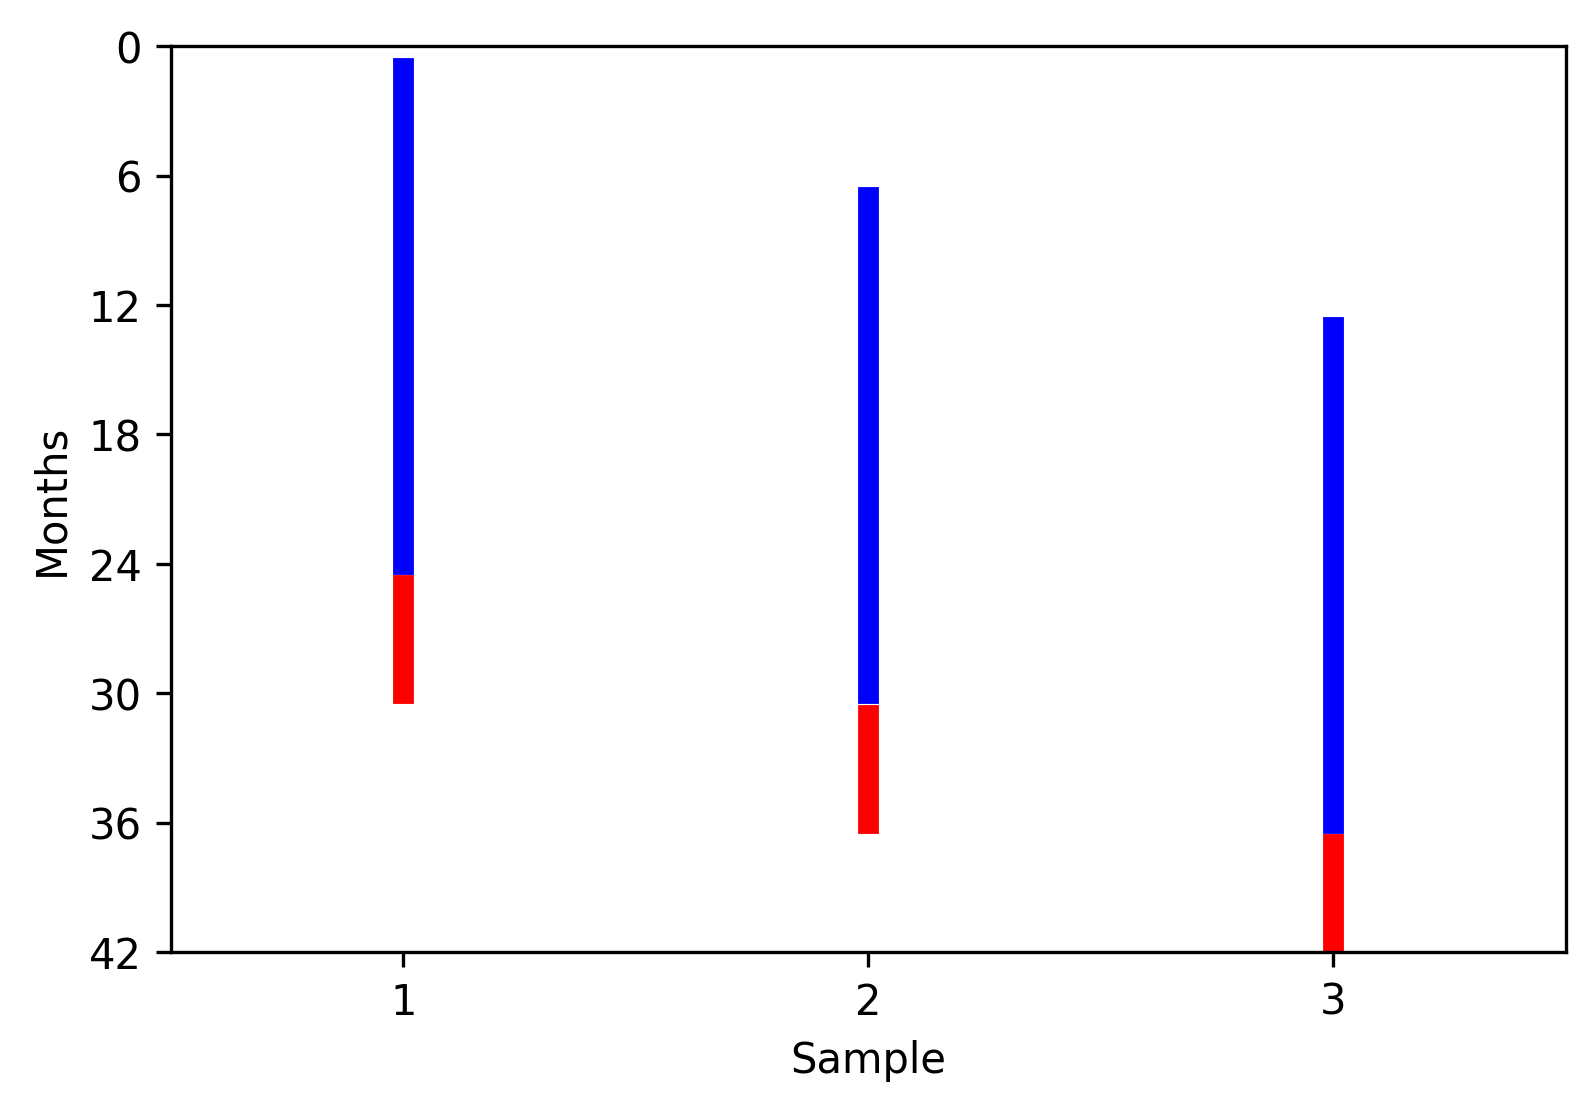

In [3]:
# time window logic plot
time_window_table = pd.DataFrame({
"months":range(1,43),
"feature_1":[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None],
"target_1": [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,1,1,1,1,1,None,None,None,None,None,None,None,None,None,None,None,None],
"feature_2":[None,None,None,None,None,None,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,None,None,None,None,None,None,None,None,None,None,None,None],
"target_2": [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,2,2,2,2,2,None,None,None,None,None,None],
"feature_3":[None,None,None,None,None,None,None,None,None,None,None,None,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,None,None,None,None,None,None],
"target_3": [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3,3,3,3,3,3]
})
fig, ax = plt.subplots(dpi=300)
ax.plot(time_window_table["feature_1"],time_window_table["months"], color="blue",linewidth=5)
ax.plot(time_window_table["feature_2"],time_window_table["months"],color="blue",linewidth=5)
ax.plot(time_window_table["feature_3"],time_window_table["months"],color="blue",linewidth=5)
ax.plot(time_window_table["target_1"],time_window_table["months"],color="red",linewidth=5)
ax.plot(time_window_table["target_2"],time_window_table["months"],color="red",linewidth=5)
ax.plot(time_window_table["target_3"],time_window_table["months"],color="red",linewidth=5)
plt.xlim([0.5,3.5])
plt.xticks([1,2,3])
plt.ylim([0,42])
plt.yticks([0,6,12,18,24,30,36,42])
plt.ylabel('Months')
plt.xlabel('Sample')
plt.gca().invert_yaxis()
fig.savefig("targetwindows.png",bbox_inches='tight')

100%|████████████████████████████████████| 41159/41159 [03:38<00:00, 188.35it/s]


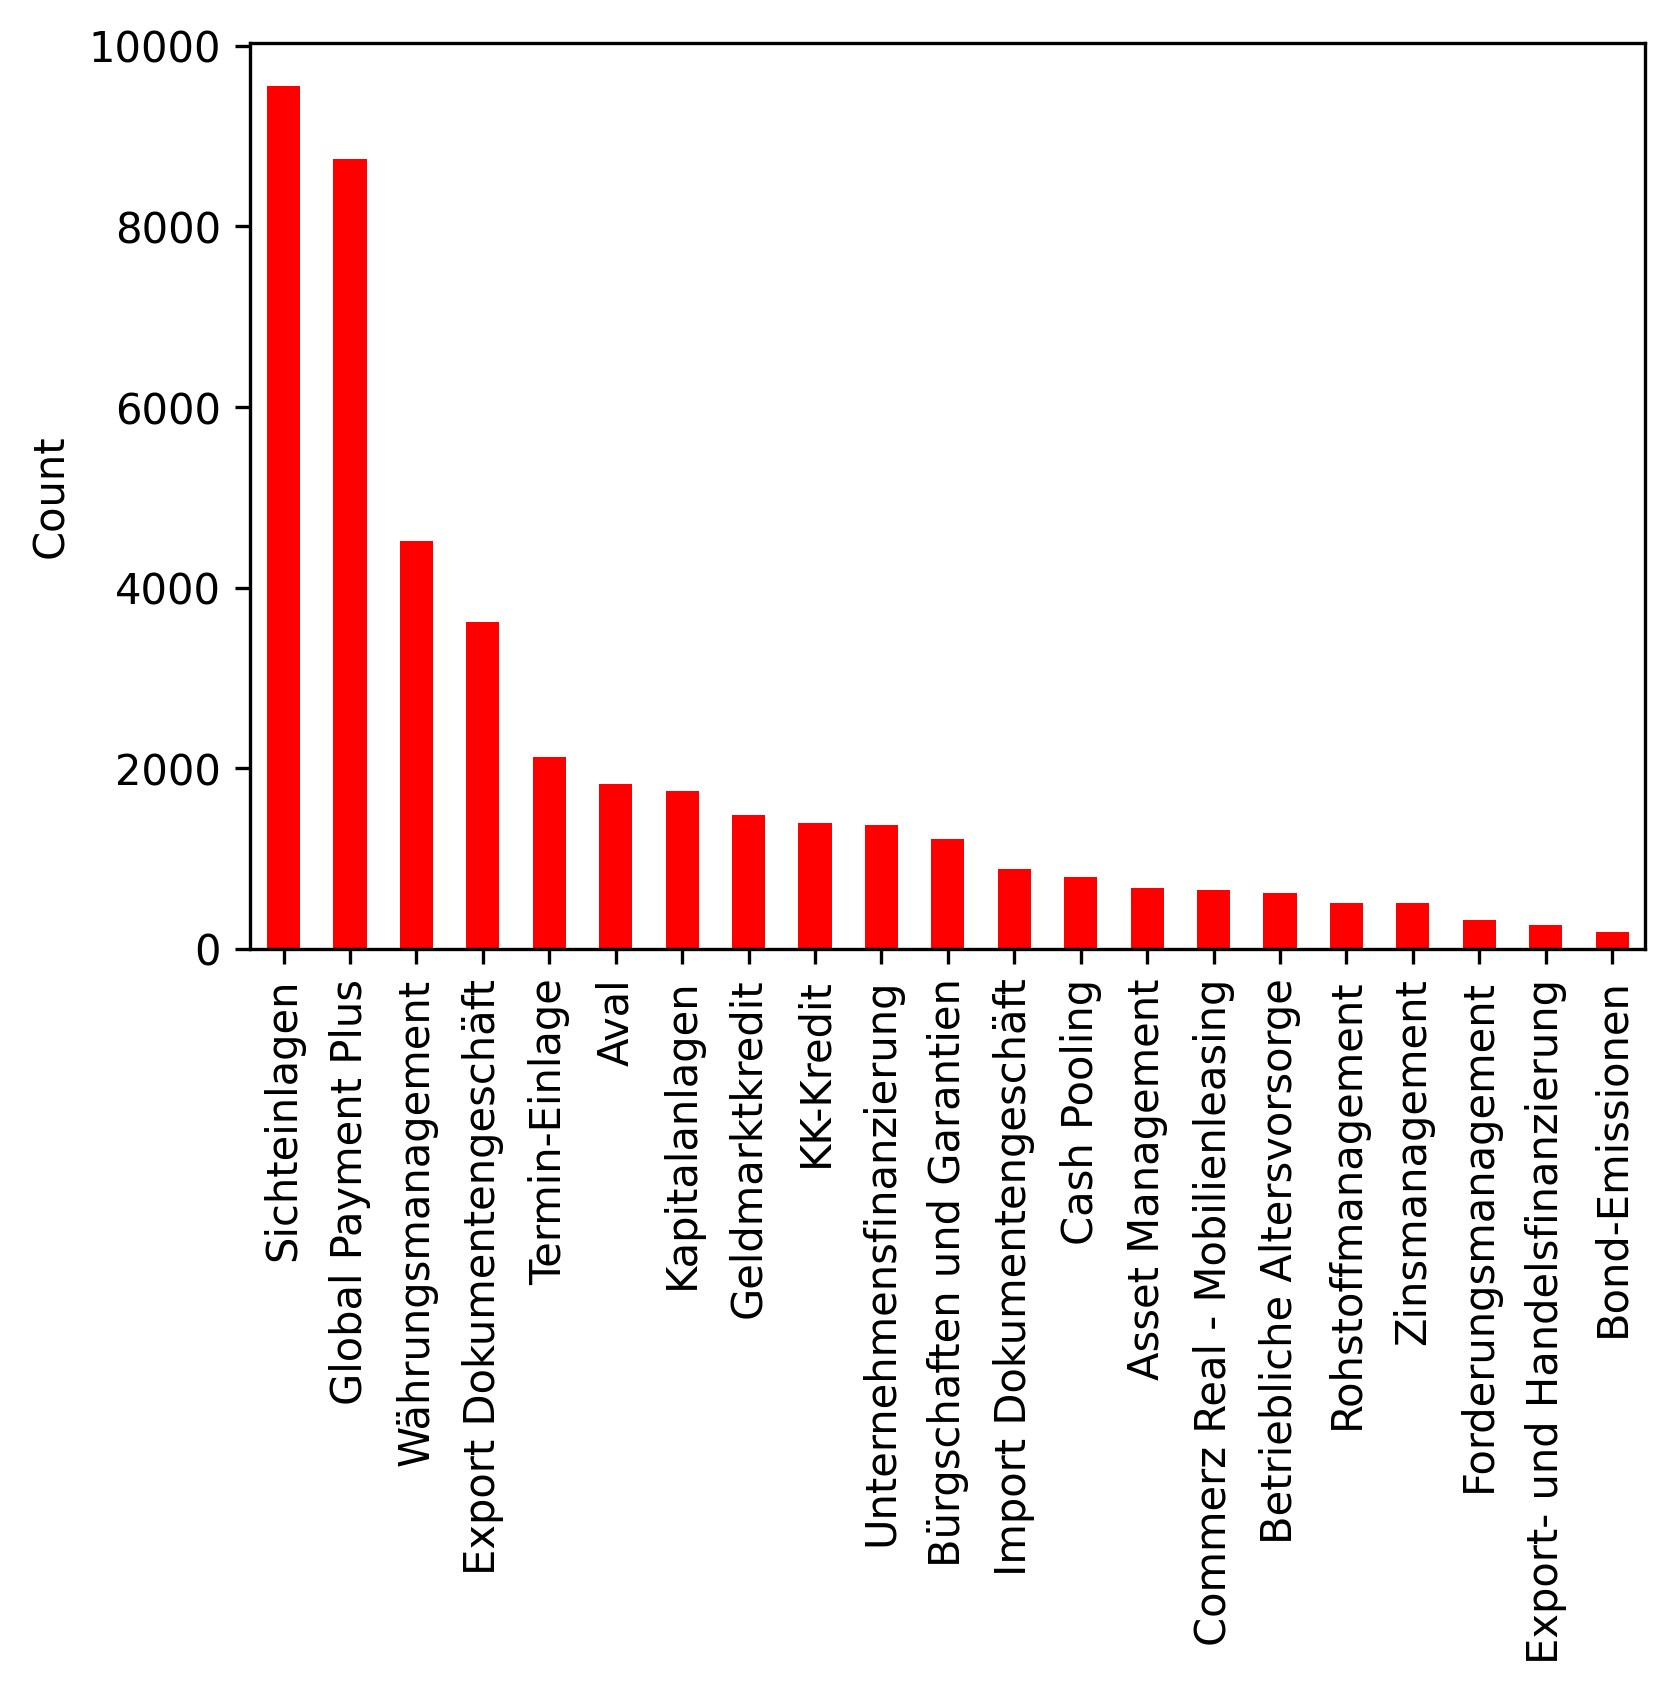

In [4]:
#plot target proudct purchase Count (at least once)
class InputDataGenerator():
    product_col_name = 'target_product'
    all_products = [
        'Asset Management', 'Aval', 'Betriebliche Altersvorsorge',
        'Bond-Emissionen', 'Bürgschaften und Garantien', 'Cash Pooling',
        'Commerz Real - Mobilienleasing',
        'Export Dokumentengeschäft', 'Export- und Handelsfinanzierung',
        'Forderungsmanagement', 'Geldmarktkredit', 'Global Payment Plus',
        'Import Dokumentengeschäft', 'KK-Kredit', 'Kapitalanlagen',
        'Rohstoffmanagement', 'Sichteinlagen', 'Termin-Einlage',
        'Unternehmensfinanzierung', 'Währungsmanagement', 'Zinsmanagement'
    ]
    def __init__(self, data: pd.DataFrame) -> None:
        self.data = data.set_index(['customer_gpkenn', 'dateYYYYMM'])[self.all_products]
    def get_client_ids_who_bought_at_least_n_products(
            self, relevant_client_ids: List[str],
            minimum_products: int) -> List[str]:
        client_id_occurence_count = self.data.reset_index(
        )['customer_gpkenn'].value_counts()
        all_client_ids_with_more_than_n_products = client_id_occurence_count[
            client_id_occurence_count >= minimum_products].index
        self.excluded_client_ids = list(
            set(relevant_client_ids) -
            set(all_client_ids_with_more_than_n_products))
        return list(
            set(relevant_client_ids)
            & set(all_client_ids_with_more_than_n_products))
    def create_client_targets_delta_sums_per_client(self, client_ids: List[str]) -> Dict[str, np.array]:
        """Loops through given client_ids and in each iteration creates X/Y data in the right format for modelling and concatenates this data with previous X/Y data. Safes formatted X/Y for all selected clients as attribute.
        """
        all_target_dates = [202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205, 202206]
        client_targets_delta_sums = []
        random.shuffle(client_ids)
        for customer_gpkenn in tqdm(client_ids):
            client_data = self.get_client_data(
                customer_gpkenn)
            client_data = client_data.loc[all_target_dates]
            target_over_time = client_data[self.all_products]
            target_changes_over_time = InputDataGenerator.get_all_deltas_from_zero_to_one(
                target_over_time)
            client_targets_delta_sums.append(target_changes_over_time.sum())
        return pd.DataFrame(client_targets_delta_sums,index=client_ids,columns=self.all_products)
    def get_client_data(self, id_one_client: str) -> pd.DataFrame:
        """Takes advantage of set index in self.data for higher performance"""
        return self.data.loc[id_one_client]
    @staticmethod
    def get_all_deltas_from_zero_to_one(
            product_matrix: pd.DataFrame) -> pd.DataFrame:
        """Turns
               A  B  C
            0  0  1  0
            1  0  1  1
            2  1  1  1
            3  1  1  0
            4  0  0  1
        into:
               A  B  C
            0  0  0  0
            1  0  0  1
            2  1  0  0
            3  0  0  0
            4  0  0  1
        """
        matrix = product_matrix.copy()
        return matrix.diff().clip(0).fillna(0).astype(int)
    
csa_data = InputDataGenerator(products_and_features_table.copy())
client_targets_delta_sums = csa_data.create_client_targets_delta_sums_per_client(list(products_and_features_table.customer_gpkenn.unique()))
client_targets_delta_sums = client_targets_delta_sums.astype(bool).astype(int)
fig, ax = plt.subplots(dpi=300)
client_targets_delta_sums.sum(axis=0).sort_values(ascending=False).plot(kind='bar',ax=ax,cmap="hsv")
plt.ylabel('Count')
fig.savefig("client_targets_delta_sums.png",bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


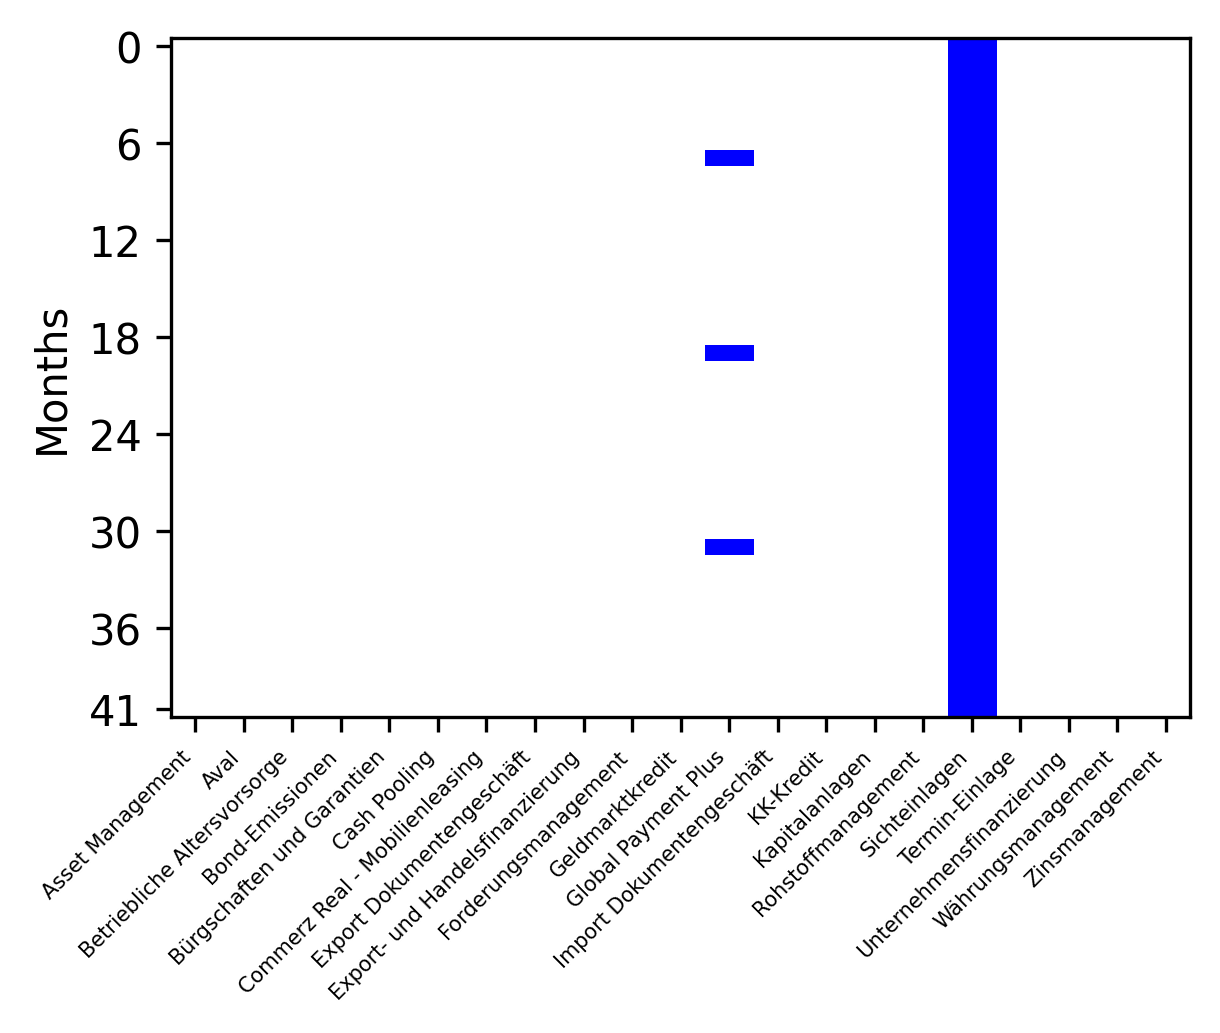

In [5]:
# product usage example plot
def widen_dataframe(data,factor):
    columns = []
    for product in data.columns:
        for i in range(1,factor+1):
            data[f"{product}0{i}"] = data[product]
            columns.append(f"{product}0{i}")
    return data[columns]
customer_gpkenn = list(products_and_features_table.copy().reset_index().customer_gpkenn.unique())[2]
products_and_features_table = products_and_features_table.set_index("customer_gpkenn")
client_data = products_and_features_table.loc[customer_gpkenn]
cmap = colors.ListedColormap(['white', 'blue'])
bounds=[0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(6.5,3),dpi=300)
ax.imshow(widen_dataframe(client_data[InputDataGenerator.all_products],3).to_numpy(),cmap=cmap,norm=norm)
ax.set_yticks([0,6,12,18,24,30,36,41])
ax.set_xticks(range(1, len(InputDataGenerator.all_products)*3+1, 3))
ax.set_xticklabels(InputDataGenerator.all_products,fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Months')
fig.savefig("product_usage.png",bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


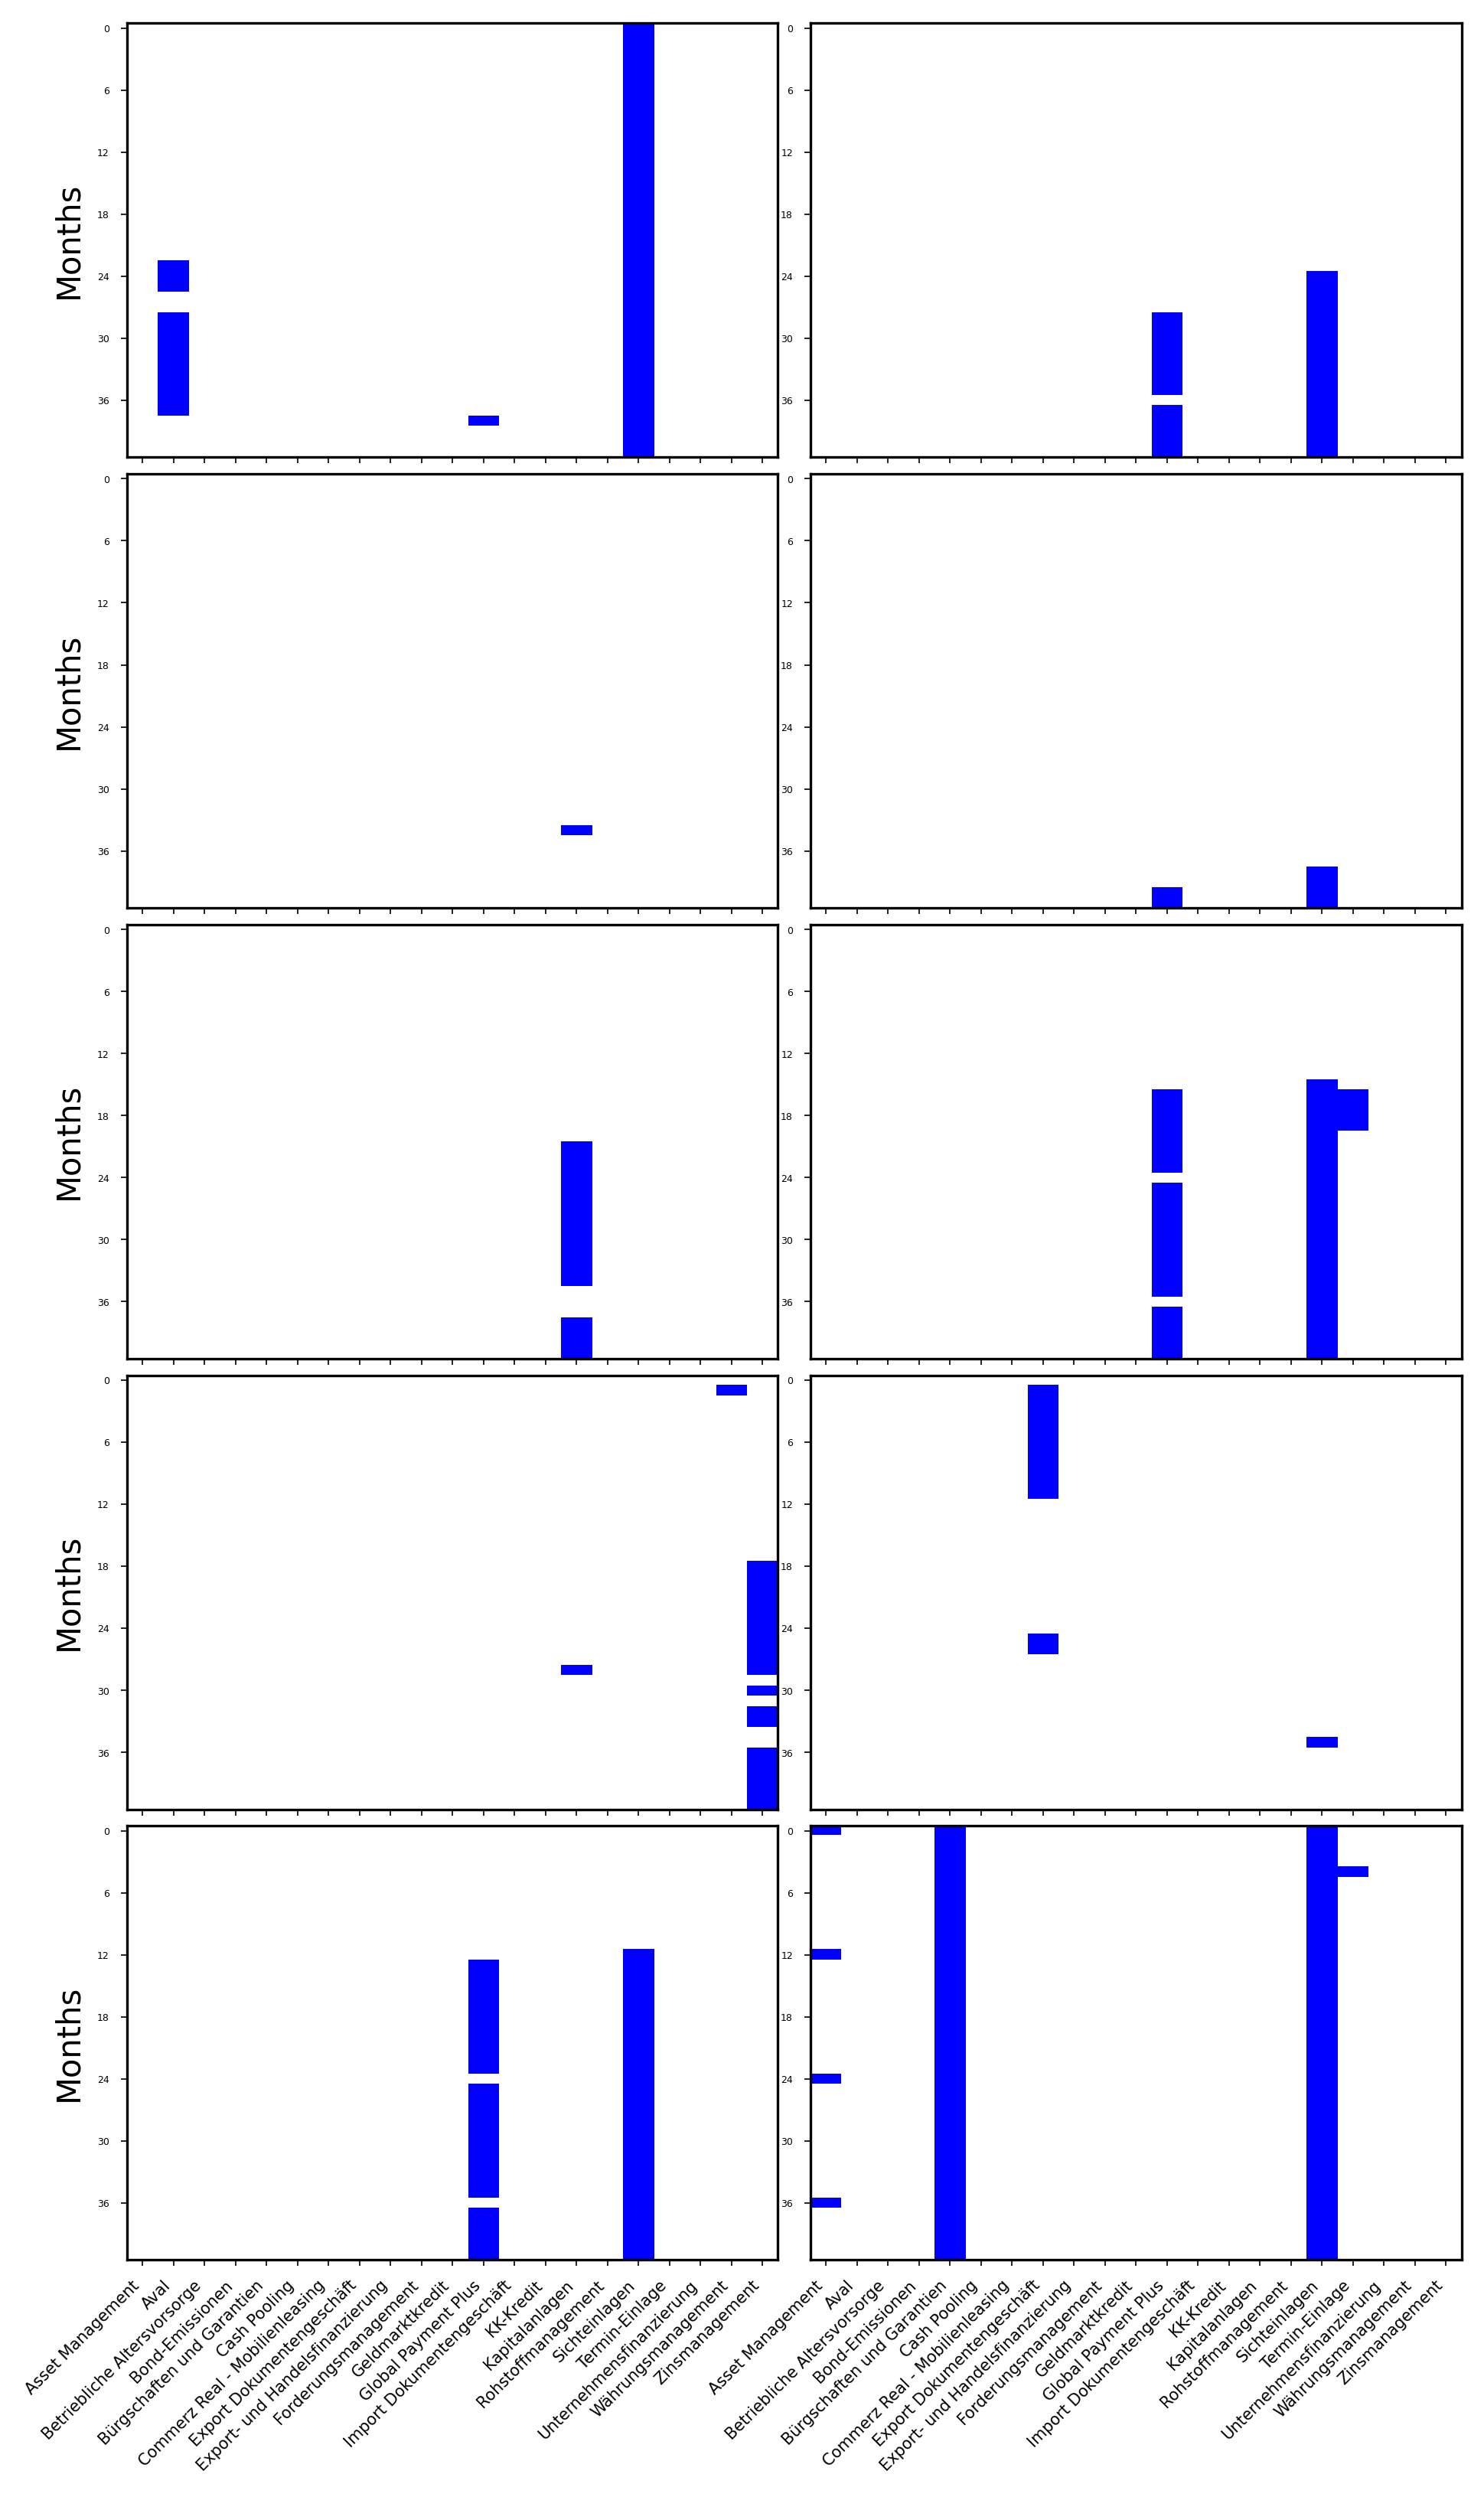

In [15]:
# revenues subplots
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(7.5,13),dpi=300)
plt.subplots_adjust(wspace=0.05, hspace=0)
cmap = colors.ListedColormap(['white', 'blue'])
bounds=[0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)
i = 0
customer_gpkenns = products_and_features_table.copy().reset_index().customer_gpkenn.unique()
norm = colors.BoundaryNorm(bounds, cmap.N)
for ax in [item for sublist in axes for item in sublist]:
    customer_gpkenn = customer_gpkenns[[60,51,72,33,54,45,356,57,8,49][i]]
    i += 1
    client_data = products_and_features_table.loc[customer_gpkenn]
    ax.imshow(widen_dataframe(client_data[InputDataGenerator.all_products],3).to_numpy(),cmap=cmap, norm=norm)
    ax.tick_params(axis='both', which='major', labelsize=3, width=0.4,length=2)
    ax.set_yticks([0,6,12,18,24,30,36])
    ax.tick_params(axis='y', which='major', labelsize=3)
    ax.set_aspect('equal')
    ax.set_xticks(range(1, len(InputDataGenerator.all_products)*3+1, 3))
    ax.set_xticklabels([])
for ax in [item for sublist in axes for item in sublist][::2]:
    ax.set_ylabel('Months')
for ax in [item for sublist in axes for item in sublist][-2:]:
    ax.set_xticklabels(InputDataGenerator.all_products,fontsize=5,rotation=45, ha='right')
fig.savefig("revenues_subplots.png",bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


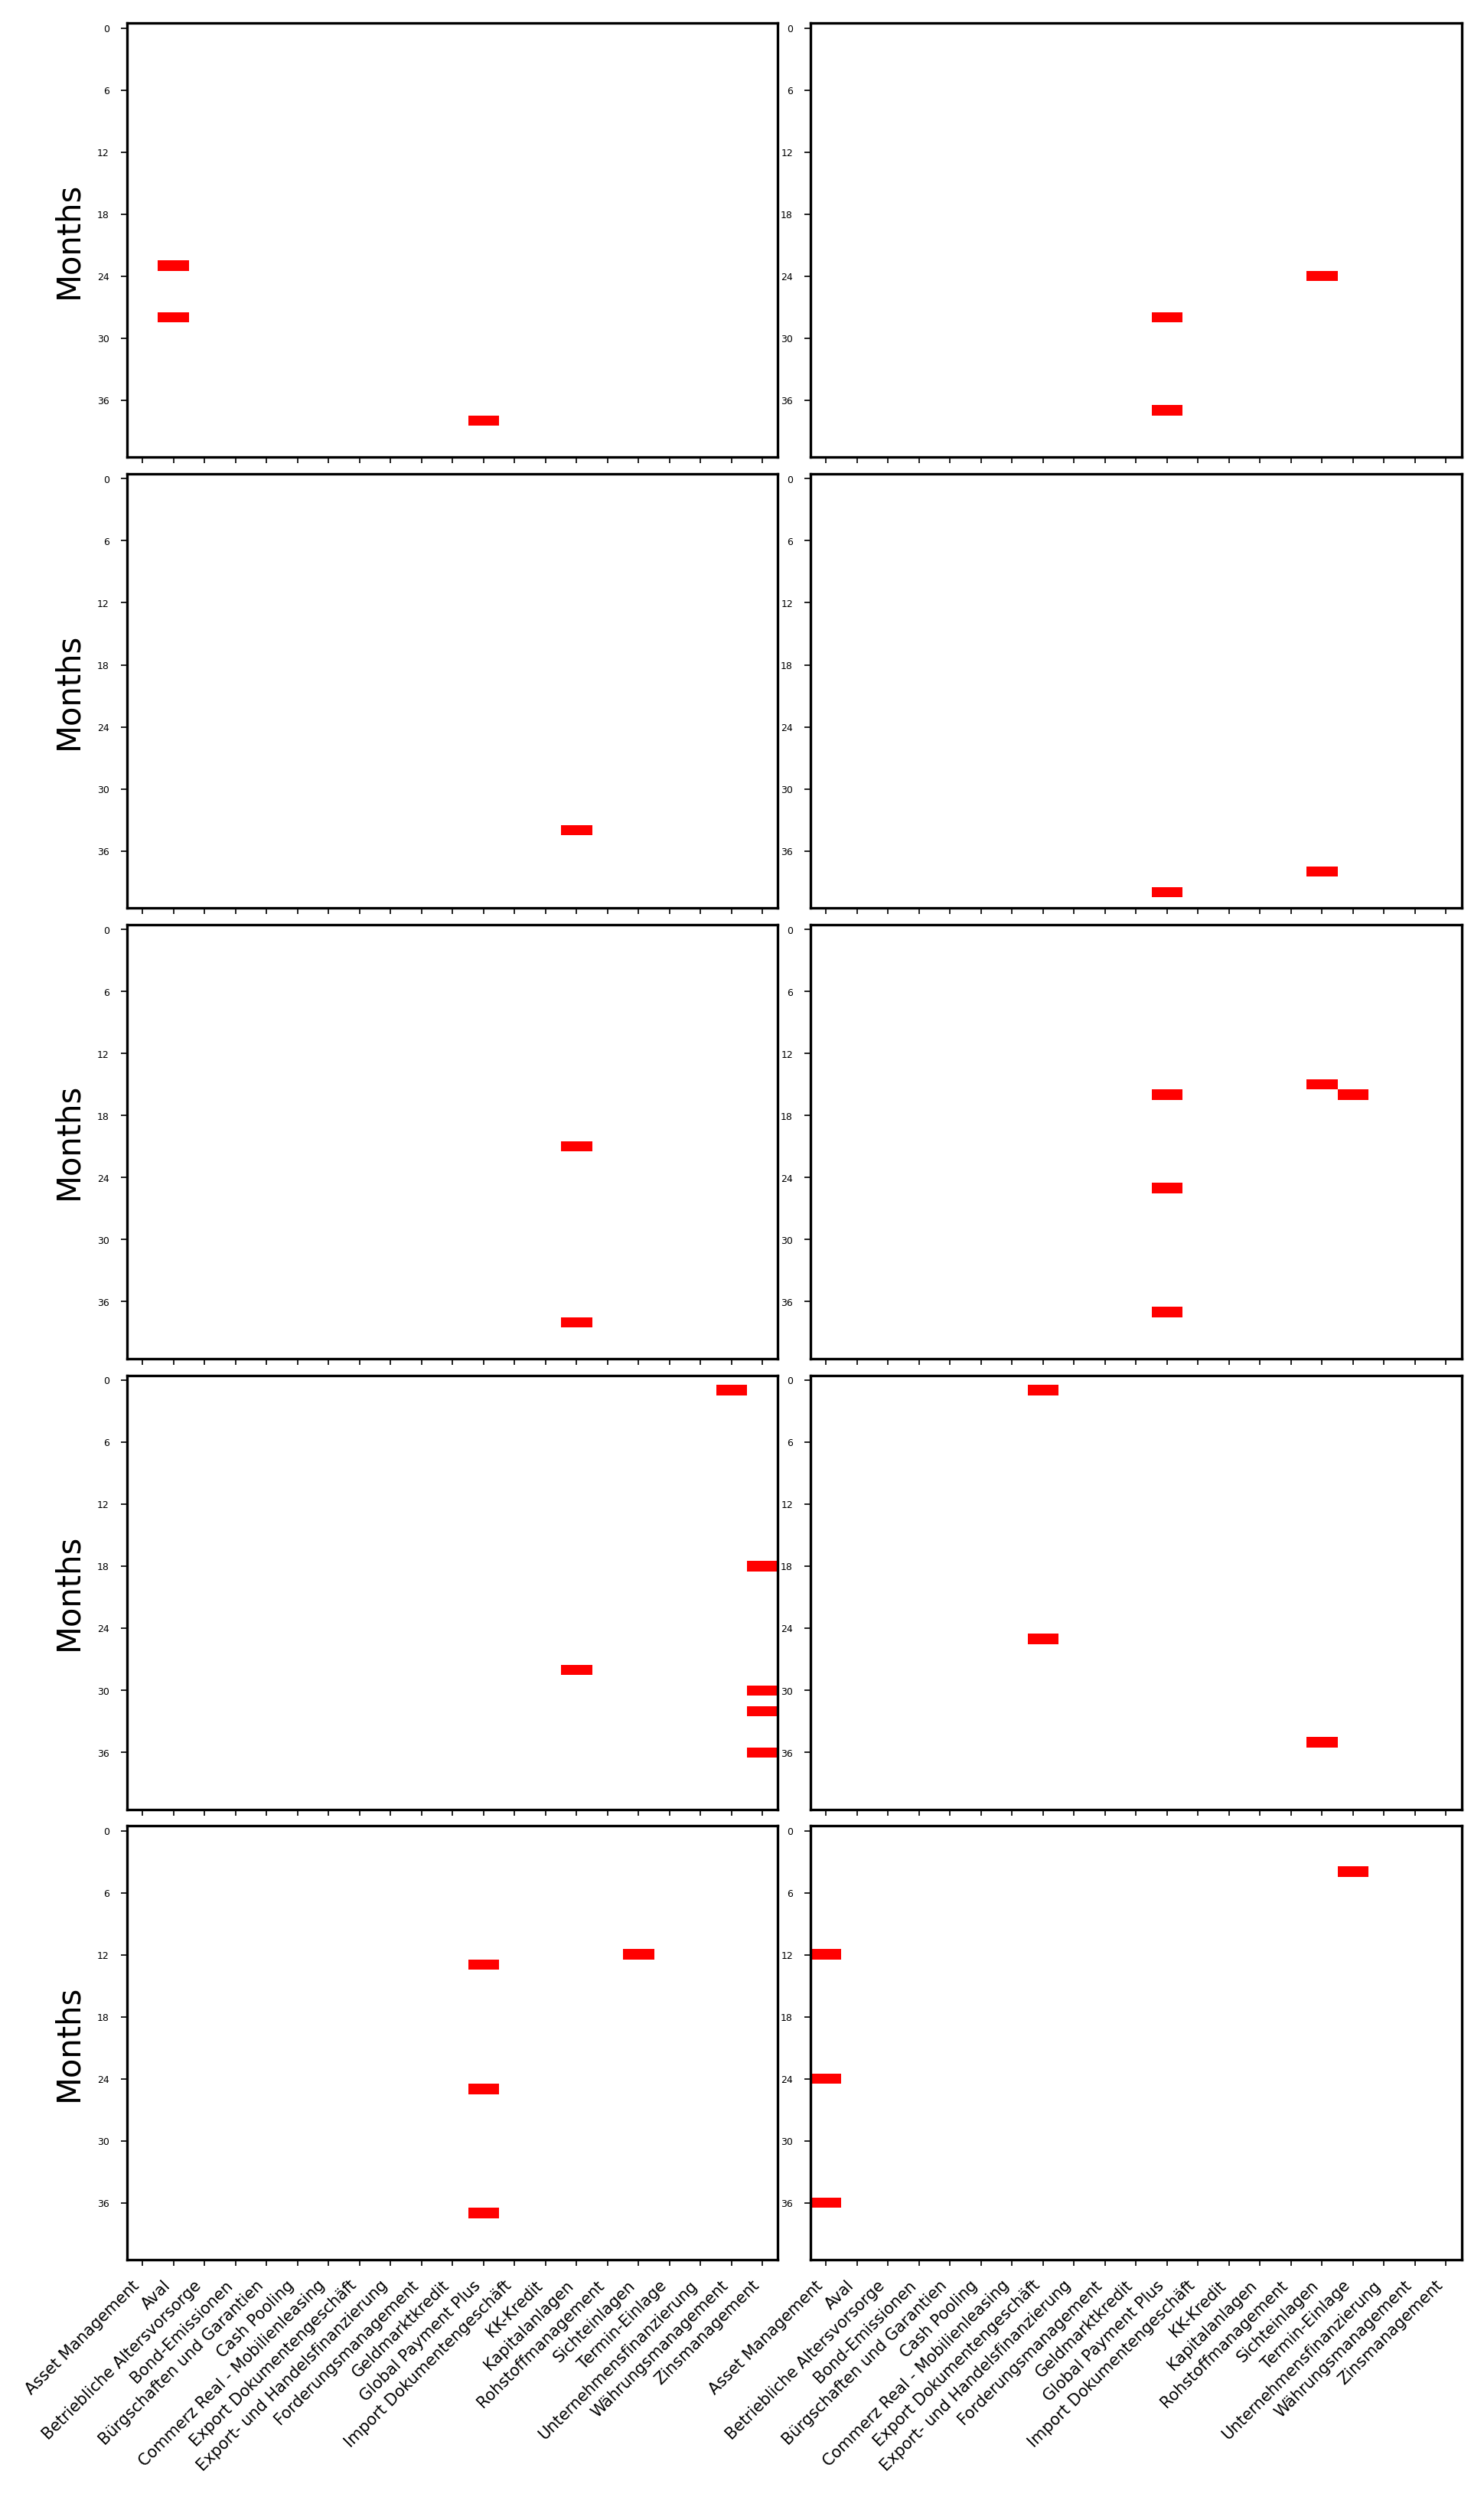

In [16]:
# purchases subplots
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(7.5,13),dpi=300)
plt.subplots_adjust(wspace=0.05, hspace=0)
cmap = colors.ListedColormap(['white', 'red'])
bounds=[0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)
i = 0
customer_gpkenns = products_and_features_table.copy().reset_index().customer_gpkenn.unique()
norm = colors.BoundaryNorm(bounds, cmap.N)
for ax in [item for sublist in axes for item in sublist]:
    customer_gpkenn = customer_gpkenns[[60,51,72,33,54,45,356,57,8,49][i]]
    i += 1
    client_data = products_and_features_table.loc[customer_gpkenn]
    ax.imshow(InputDataGenerator.get_all_deltas_from_zero_to_one(widen_dataframe(client_data[InputDataGenerator.all_products],3)).to_numpy(),cmap=cmap, norm=norm)
    ax.tick_params(axis='both', which='major', labelsize=3, width=0.4,length=2)
    ax.set_yticks([0,6,12,18,24,30,36])
    ax.tick_params(axis='y', which='major', labelsize=3)
    ax.set_aspect('equal')
    ax.set_xticks(range(1, len(InputDataGenerator.all_products)*3+1, 3))
    ax.set_xticklabels([])
for ax in [item for sublist in axes for item in sublist][::2]:
    ax.set_ylabel('Months')
for ax in [item for sublist in axes for item in sublist][-2:]:
    ax.set_xticklabels(InputDataGenerator.all_products,fontsize=5,rotation=45, ha='right')
fig.savefig("purchases_subplots.png",bbox_inches='tight')